## 2022년 전국 미분양 비율

In [87]:
import pandas as pd
import numpy as np

data1=pd.read_excel('미분양_2022.xlsx', index_col=0)
print(data1.columns)
print(data1.head()) 

Index(['2022.01 월', '2022.02 월', '2022.03 월', '2022.04 월', '2022.05 월',
       '2022.06 월', '2022.07 월', '2022.08 월', '2022.09 월', '2022.10 월',
       '2022.11 월', '2022.12 월', 'total'],
      dtype='object')
    2022.01 월  2022.02 월  2022.03 월  2022.04 월  2022.05 월  2022.06 월  \
구분                                                                     
서울         47         47        180        360        688        719   
부산        921       1028       1013       1003       1220       1267   
대구       3678       4561       6572       6827       6816       6718   
인천        423        409        532        464        426        418   
광주          6          5          2          2         46        198   

    2022.07 월  2022.08 월  2022.09 월  2022.10 월  2022.11 월  2022.12 월  total  
구분                                                                           
서울        592        610        719        866        865        953   6646  
부산       1503       1799       1973       2514      

In [88]:
data2=pd.read_excel('분양_2022.xlsx', index_col=0)
print(data2.columns)
print(data2.head())

Index(['2022.01', '2022.02', '2022.03', '2022.04', '2022.05', '2022.06',
       '2022.07', '2022.08', '2022.09', '2022.10', '2022.11', '2022.12',
       'total'],
      dtype='object')
    2022.01  2022.02  2022.03  2022.04  2022.05  2022.06  2022.07  2022.08  \
지역                                                                           
서울      433      424      464        0        0      148      114      231   
인천     1114     1786     2455      162      767     1170     1326      875   
경기     4437     5541     5042     2326     4674     2957     2877     1274   
부산        0      544      725      102        0        0        0        0   
대구        0     1880      424       69      178      440     3318       99   

    2022.09  2022.10  2022.11  2022.12  total  
지역                                             
서울        0        0     6690      219   8723  
인천      474     1285      670      485  12569  
경기     4912     5270     7932     3352  50594  
부산        0        0      11

In [89]:
df=pd.DataFrame([data1['total'],data2['total']],index=['미분양','분양'])
df=df.T
df

,미분양,분양
서울,6646,8723
부산,19455,1487
대구,97510,8612
인천,12610,12569
광주,1431,726
대전,11888,9649
울산,13786,4337
경기,44671,50594
강원,19429,7277
충북,15434,14741


In [90]:
df['미분양비율']=df['미분양']/(df['미분양']+df['분양'])
df

,미분양,분양,미분양비율
서울,6646,8723,0.432429
부산,19455,1487,0.928994
대구,97510,8612,0.918848
인천,12610,12569,0.500814
광주,1431,726,0.663421
대전,11888,9649,0.551980
울산,13786,4337,0.760691
경기,44671,50594,0.468913
강원,19429,7277,0.727514
충북,15434,14741,0.511483


#### 지도 시각화

In [91]:
from matplotlib import font_manager

fe = font_manager.FontEntry(
    fname=r'C:\Users\KDP-26-\AppData\Local\Microsoft\Windows\Fonts\TENADA.ttf', # ttf 파일이 저장되어 있는 경로
    name='TENADA')                        # 이 폰트의 원하는 이름 설정
font_manager.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 12, 'font.family': 'TENADA'}) # 폰트 설정


In [94]:
import folium

paldo_map=folium.Map(location=[36,128],zoom_start=8)
geo_path='SIDO_MAP_2022.json' # 시도 경계 데이터

not_sale_ratio = df['미분양비율']

# 지도에 Choropleth Layer 추가하기
map=folium.Choropleth(
    geo_data=geo_path,
    data=not_sale_ratio,
    columns=[not_sale_ratio.index, not_sale_ratio],
    fill_color='YlOrRd',
    key_on='feature.properties.CTP_KOR_NM',
    vmin=0,  # 값의 최솟값
    vmax=1,  # 값의 최댓값
    fill_opacity=0.7
).add_to(paldo_map)

# LayerControl 추가하기
folium.LayerControl().add_to(paldo_map)

# 지도를 HTML 파일로 저장하기
paldo_map.save('map_not_sale_ratio.html')


### 막대 그래프

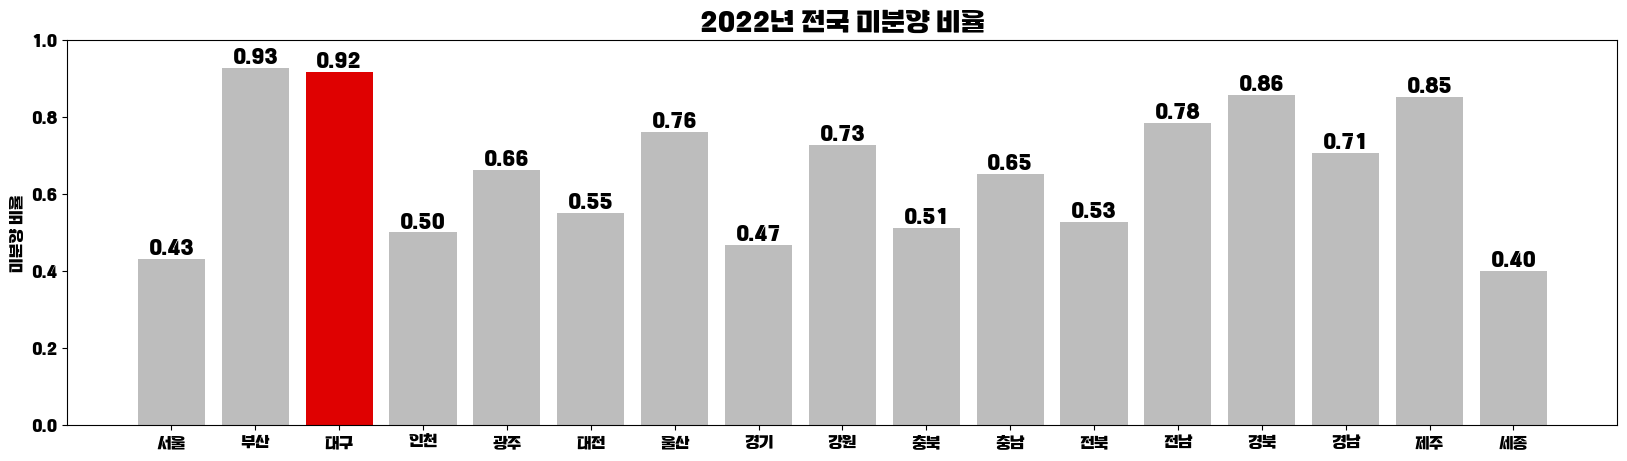

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
a='#BDBDBD'
b='#DF0101'
color=[a,a,b,a,a,a,a,a,a,a,a,a,a,a,a]

plt.bar(df.index,df['미분양비율'],color=color)
plt.ylabel('미분양 비율')
plt.xticks(rotation=0)
plt.title('2022년 전국 미분양 비율', size=20)
plt.ylim(0,1)
# 데이터 레이블 표시하기
for i, v in enumerate(df['미분양비율']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', size=15)
    
plt.show()

In [ ]:
df

,미분양,분양,미분양비율
서울,6646,8723,0.432429
부산,19455,1487,0.928994
대구,97510,8612,0.918848
인천,12610,12569,0.500814
광주,1431,726,0.663421
대전,11888,9649,0.551980
울산,13786,4337,0.760691
경기,44671,50594,0.468913
강원,19429,7277,0.727514
충북,15434,14741,0.511483


In [ ]:
df['미분양']['서울':'울산']

서울     6646
부산    19455
대구    97510
인천    12610
광주     1431
대전    11888
울산    13786
Name: 미분양, dtype: int64

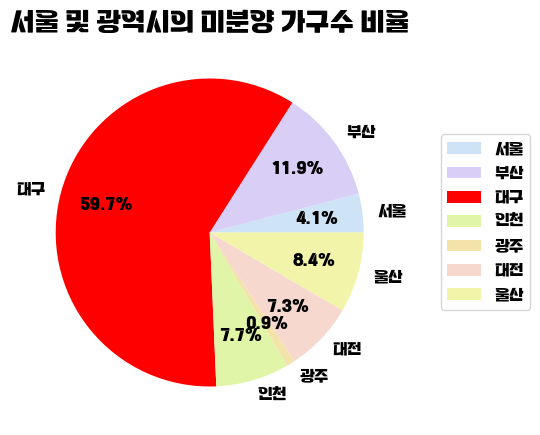

In [95]:
# 서울 및 광역시의 미분양 가구수 _ 서울 ~ 울산
plt.figure(figsize=(20,5))

color=['#CEE3F6','#D8CEF6','#FF0000','#E1F5A9','#F3E2A9','#F6D8CE','#F2F5A9']
plt.pie(df['미분양']['서울':'울산'], labels=['서울','부산','대구','인천','광주','대전','울산'],colors=color, autopct='%1.1f%%', pctdistance=0.7) 

plt.legend(loc=(1.1,0.3))
plt.title("서울 및 광역시의 미분양 가구수 비율", size=20)
plt.show()